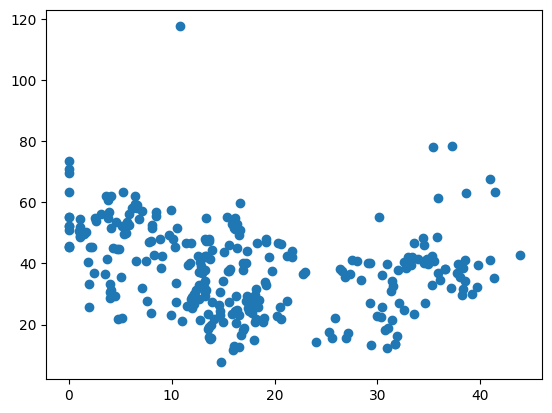

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from supervised_learning.regression import Regression
from supervised_learning.polynomial_regression import PolynomialRegression

from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/real_estate.csv')
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# 只取X2 house age这一列
X_train = X_train['X2 house age']
X_test = X_test['X2 house age']
# to numpy
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# print a chart of the X_train and y_train
plt.scatter(X_train, y_train)
plt.show()
# 这里我们认为，房龄越大，房价越低，应该存在线性回归关系
# 所以我们选择一个线性回归模型

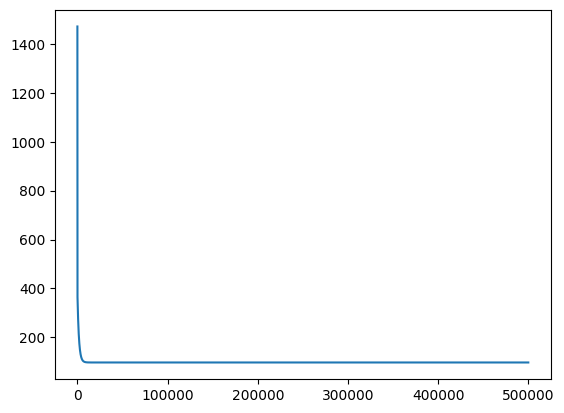

In [2]:

model = Regression(500000,1e-3)
# X_train = X_train.reshape(-1,1)
# X_train.shape
# model.w.shape, X_train.shape, y_train.shape
model.fit(X_train, y_train)
# 看一下training_errors
plt.plot(model.training_errors)

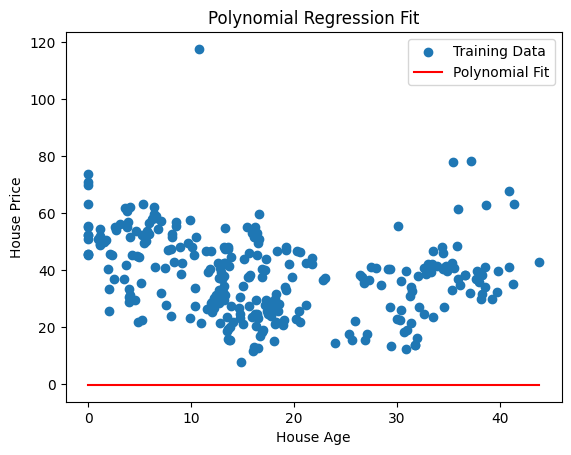

(array([-0.29738827]), 43.61344023721246)

In [3]:

# 生成一系列用于绘制拟合曲线的x值
x_values = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)

# 使用模型的权重生成拟合曲线的y值
y_values = np.polyval(model.w[::-1], x_values)  # 注意要逆序权重数组

# 绘制拟合曲线
plt.scatter(X_train, y_train, label='Training Data')
plt.plot(x_values, y_values, color='red', label='Polynomial Fit')
plt.xlabel('House Age')
plt.ylabel('House Price')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()
model.w, model.b

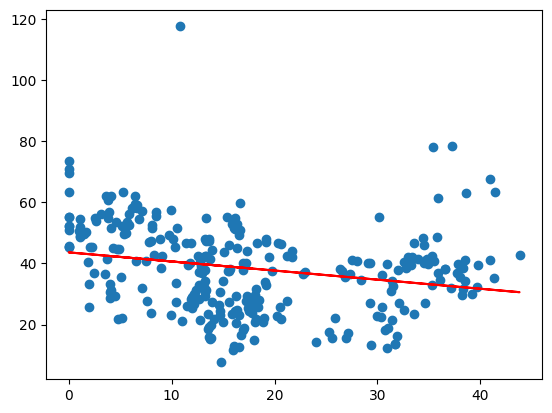

In [4]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model.w[0]*X_train + model.b, 'r')
plt.show()